Test out the new astrometry metrics

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('ewok_1004_sqlite.db')
outDir = 'astrometry2'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
sqls = ['night < 100', 'night < 1200']
slicer = slicers.HealpixSlicer(nside=16)
for sql in sqls:
    metric = metrics.ParallaxCoverageMetric()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict={'colorMin':0,'colorMax':1}))
    metric = metrics.ParallaxHADegenMetric()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict={'colorMin':-1,'colorMax':1}))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying database with constraint night < 1200
Found 818239 visits
Running:  ['opsim_ParallaxCoverageMetric_night_lt_1200_HEAL', 'opsim_ParallaxHADegenMetric_night_lt_1200_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night < 100
Found 77789 visits
Running:  ['opsim_ParallaxHADegenMetric_night_lt_100_HEAL', 'opsim_ParallaxCoverageMetric_night_lt_100_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 1200 sqlconstraint now.
monopole: 0.519441  dipole: lon: 130.033, lat: -70.9233, amp: 0.15199
monopole: 0.0423459  dipole: lon: 69.9, lat: 28.7991, amp: 0.183348
Plotting complete.
Plotting figures with night < 100 sqlconstraint now.
monopole: 0.127054  dipole: lon: 47.9858, lat: 15.0307, amp: 0.468034
monopole: 0.124491  dipole: lon: 121.451, lat: -27.961, amp: 0.220876
Plotting complete.


/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/scipy/stats/stats.py:2749: RuntimeWarning: invalid value encountered in true_divide
  t = rs * np.sqrt((n-2) / ((rs+1.0)*(1.0-rs)))
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1728: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1728: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1729: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


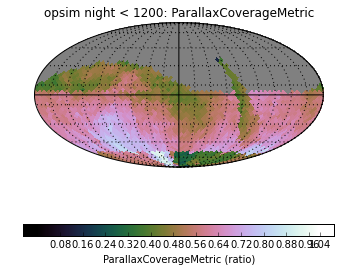

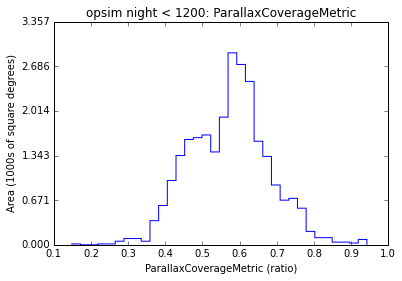

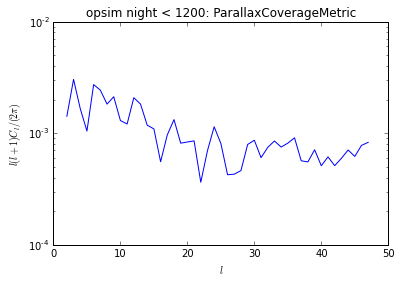

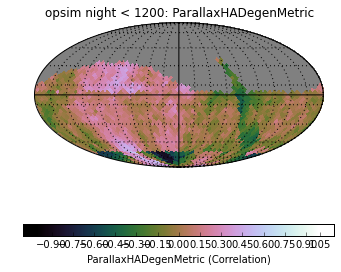

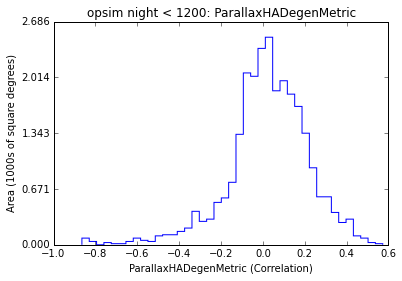

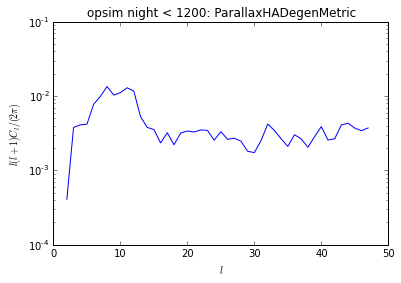

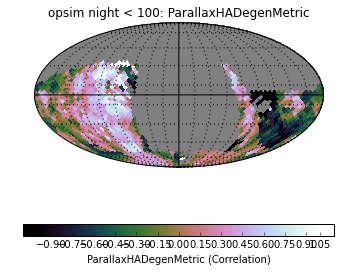

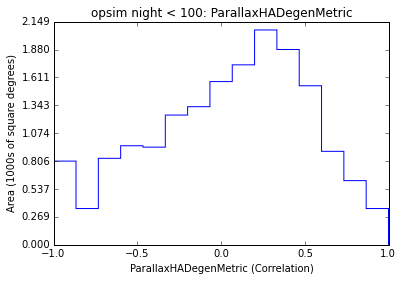

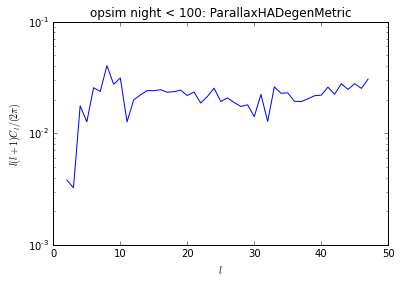

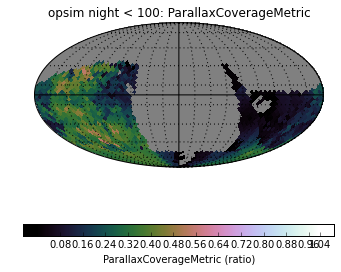

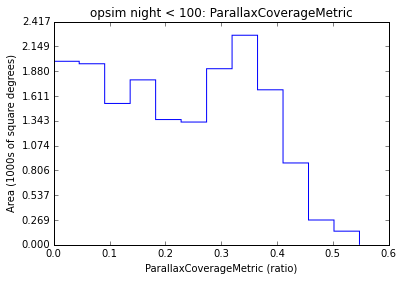

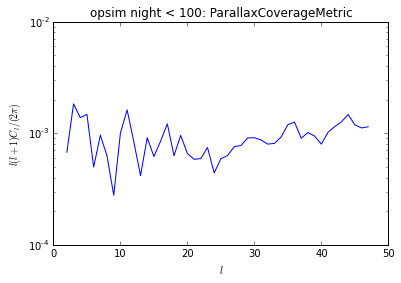

In [4]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [5]:
# Now let's try to do some red and blue stars
bundleList = []
sqls = ['night < 100', 'night < 1200']
slicer = slicers.HealpixSlicer(nside=16)
for sql in sqls:
    metric = metrics.ParallaxCoverageMetric(SedTemplate='B', metricName='BlueCoverage')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict={'colorMin':0,'colorMax':1}))
    metric = metrics.ParallaxCoverageMetric(SedTemplate='K', metricName='RedCoverage')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict={'colorMin':0,'colorMax':1}))
    
    metric = metrics.ParallaxHADegenMetric(SedTemplate='B', metricName='BlueDegen')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict={'colorMin':-1,'colorMax':1}))
    metric = metrics.ParallaxHADegenMetric(SedTemplate='K', metricName='RedDegen')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict={'colorMin':-1,'colorMax':1}))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying database with constraint night < 1200
Found 818239 visits
Running:  ['opsim_BlueCoverage_night_lt_1200_HEAL', 'opsim_RedCoverage_night_lt_1200_HEAL', 'opsim_RedDegen_night_lt_1200_HEAL', 'opsim_BlueDegen_night_lt_1200_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night < 100
Found 77789 visits
Running:  ['opsim_BlueDegen_night_lt_100_HEAL', 'opsim_BlueCoverage_night_lt_100_HEAL', 'opsim_RedCoverage_night_lt_100_HEAL', 'opsim_RedDegen_night_lt_100_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 1200 sqlconstraint now.
monopole: 0.518761  dipole: lon: 141.212, lat: -69.5484, amp: 0.147286
monopole: 0.519077  dipole: lon: 125.755, lat: -71.5962, amp: 0.152037
monopole: 0.0415347  dipole: lon: 70.0246, lat: 28.4542, amp: 0.184583
monopole: 0.0413575  dipole: lon: 70.1318, lat: 27.9872, amp: 0.183262
Plotting complet

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


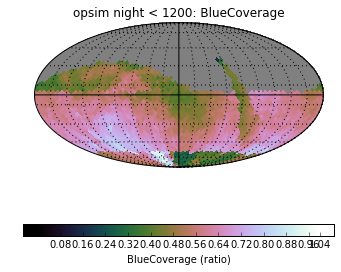

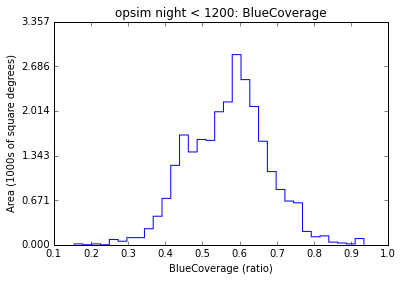

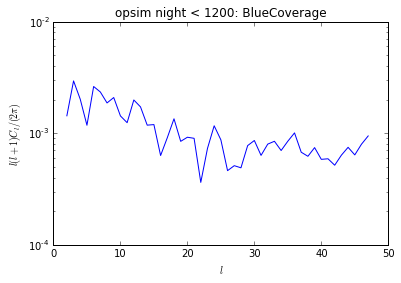

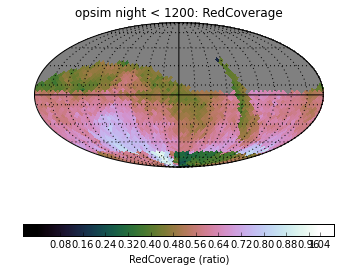

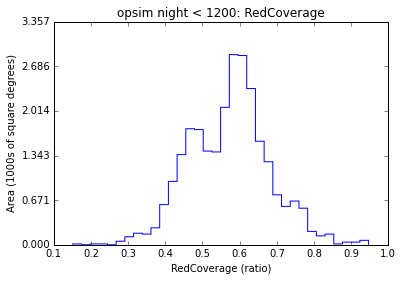

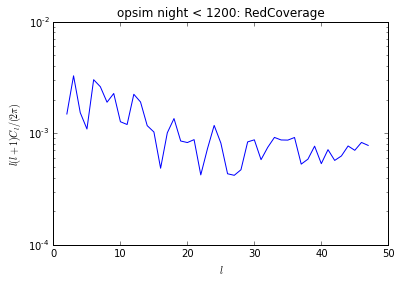

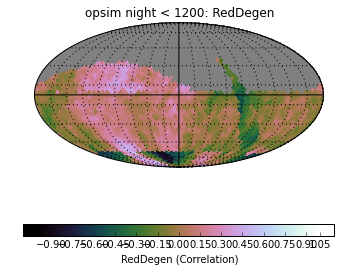

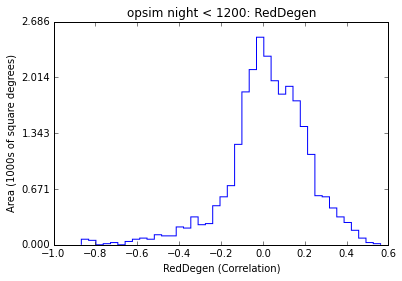

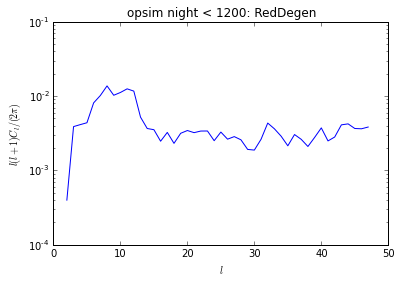

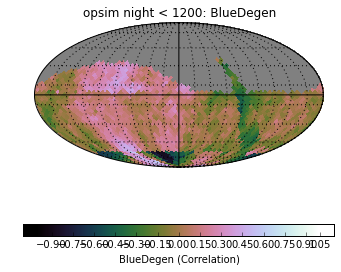

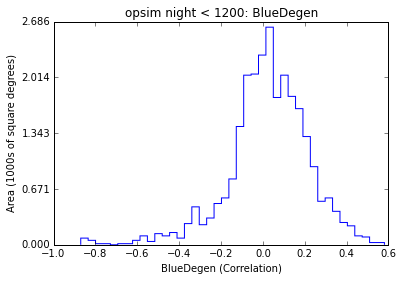

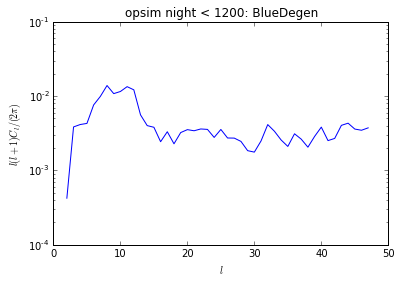

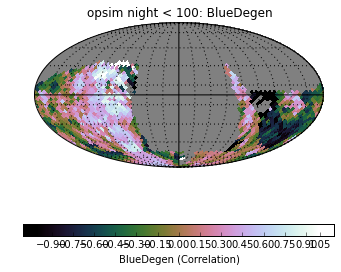

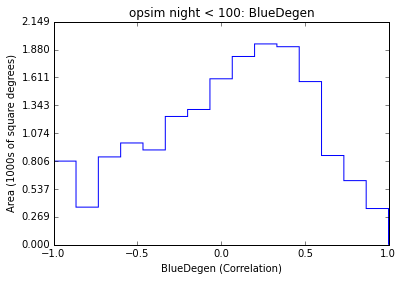

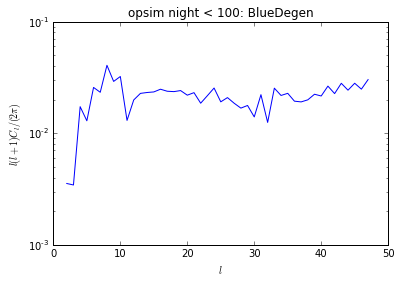

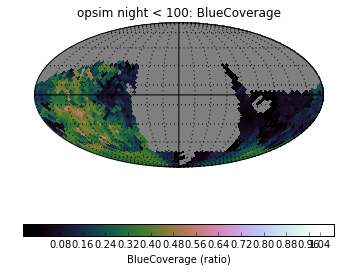

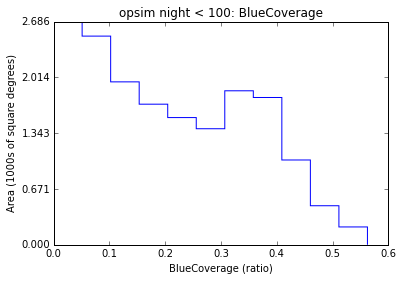

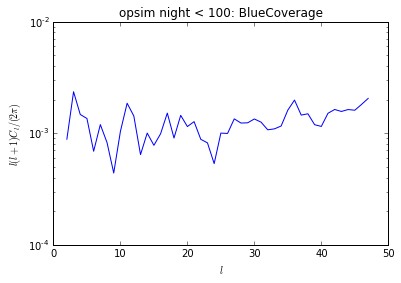

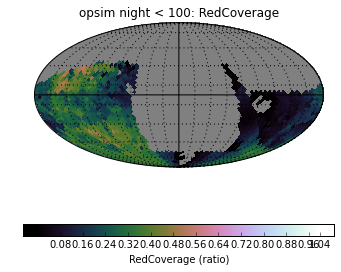

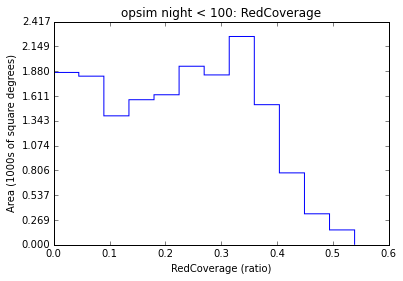

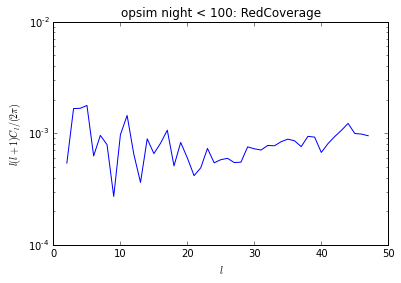

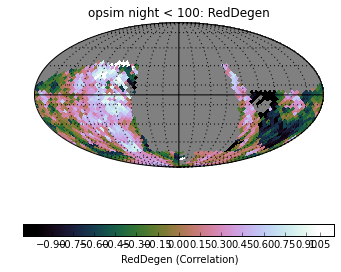

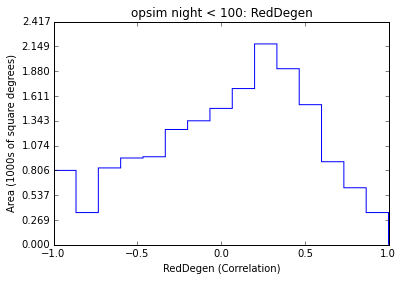

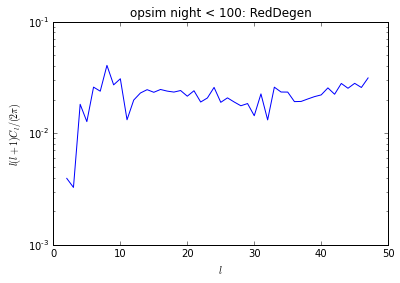

In [6]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)